Epoch [1/20]
  Training Loss: 1.1689, MAE: 0.7053, R²: 0.1256
  Validation Loss: 0.5401, MAE: 0.5247, R²: 0.5870
Epoch [2/20]
  Training Loss: 0.4571, MAE: 0.4801, R²: 0.6581
  Validation Loss: 0.4252, MAE: 0.4664, R²: 0.6746
Epoch [3/20]
  Training Loss: 0.4002, MAE: 0.4505, R²: 0.7006
  Validation Loss: 0.3958, MAE: 0.4419, R²: 0.6968
Epoch [4/20]
  Training Loss: 0.3779, MAE: 0.4363, R²: 0.7173
  Validation Loss: 0.3805, MAE: 0.4318, R²: 0.7086
Epoch [5/20]
  Training Loss: 0.3641, MAE: 0.4275, R²: 0.7276
  Validation Loss: 0.3614, MAE: 0.4251, R²: 0.7233
Epoch [6/20]
  Training Loss: 0.3506, MAE: 0.4186, R²: 0.7377
  Validation Loss: 0.3720, MAE: 0.4473, R²: 0.7155
Epoch [7/20]
  Training Loss: 0.3459, MAE: 0.4144, R²: 0.7413
  Validation Loss: 0.3442, MAE: 0.4059, R²: 0.7364
Epoch [8/20]
  Training Loss: 0.3339, MAE: 0.4056, R²: 0.7502
  Validation Loss: 0.3389, MAE: 0.4059, R²: 0.7406
Epoch [9/20]
  Training Loss: 0.3264, MAE: 0.3996, R²: 0.7558
  Validation Loss: 0.3386, MAE: 0.

C:\Users\amanb\AppData\Local\Temp\ipykernel_70668\1612194509.py:80: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at ..\torch\csrc\utils\python_arg_parser.cpp:1519.)
  m.mul_(beta1).add_(1 - beta1, grad)


Epoch [1/20]
  Training Loss: 0.5878, MAE: 0.5311, R²: 0.5603
  Validation Loss: 0.4048, MAE: 0.4407, R²: 0.6897
Epoch [2/20]
  Training Loss: 0.3806, MAE: 0.4367, R²: 0.7153
  Validation Loss: 0.3718, MAE: 0.4269, R²: 0.7152
Epoch [3/20]
  Training Loss: 0.3599, MAE: 0.4232, R²: 0.7308
  Validation Loss: 0.3571, MAE: 0.4236, R²: 0.7265
Epoch [4/20]
  Training Loss: 0.3442, MAE: 0.4123, R²: 0.7425
  Validation Loss: 0.3746, MAE: 0.4138, R²: 0.7130
Epoch [5/20]
  Training Loss: 0.3320, MAE: 0.4033, R²: 0.7516
  Validation Loss: 0.3352, MAE: 0.3998, R²: 0.7433
Epoch [6/20]
  Training Loss: 0.3238, MAE: 0.3967, R²: 0.7578
  Validation Loss: 0.3396, MAE: 0.4027, R²: 0.7401
Epoch [7/20]
  Training Loss: 0.3155, MAE: 0.3905, R²: 0.7640
  Validation Loss: 0.3155, MAE: 0.3900, R²: 0.7586
Epoch [8/20]
  Training Loss: 0.3076, MAE: 0.3854, R²: 0.7699
  Validation Loss: 0.3187, MAE: 0.3838, R²: 0.7559
Epoch [9/20]
  Training Loss: 0.3056, MAE: 0.3822, R²: 0.7714
  Validation Loss: 0.3170, MAE: 0.

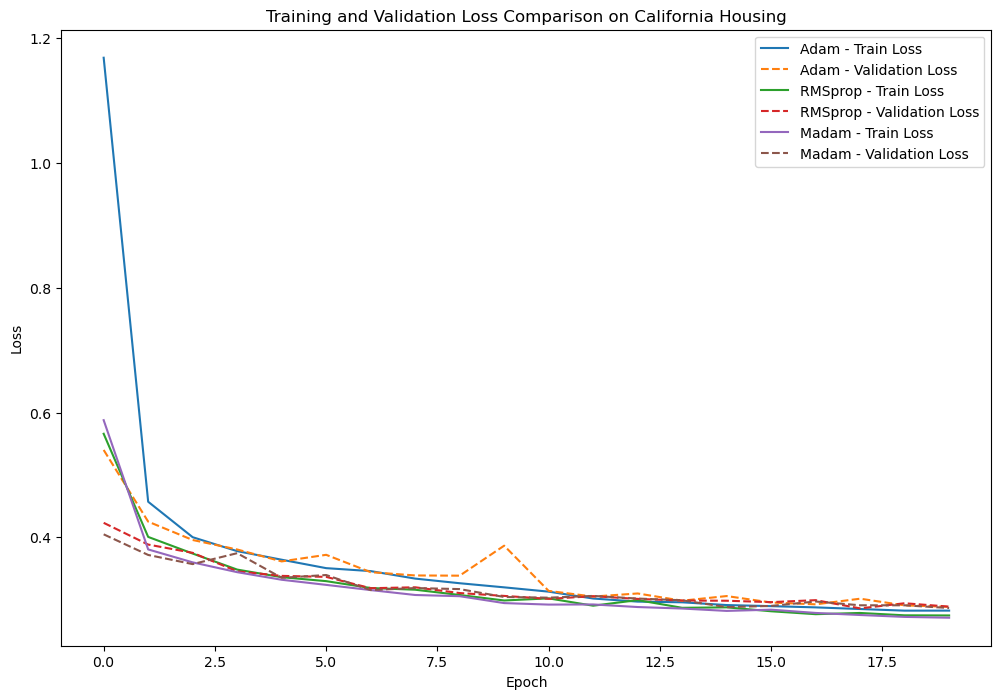

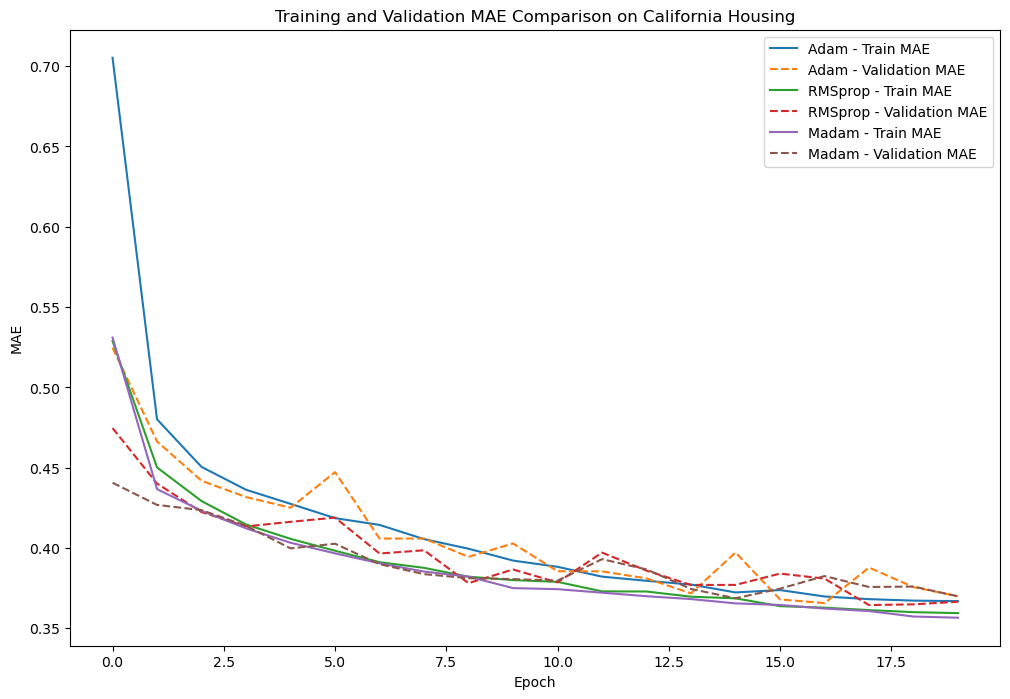

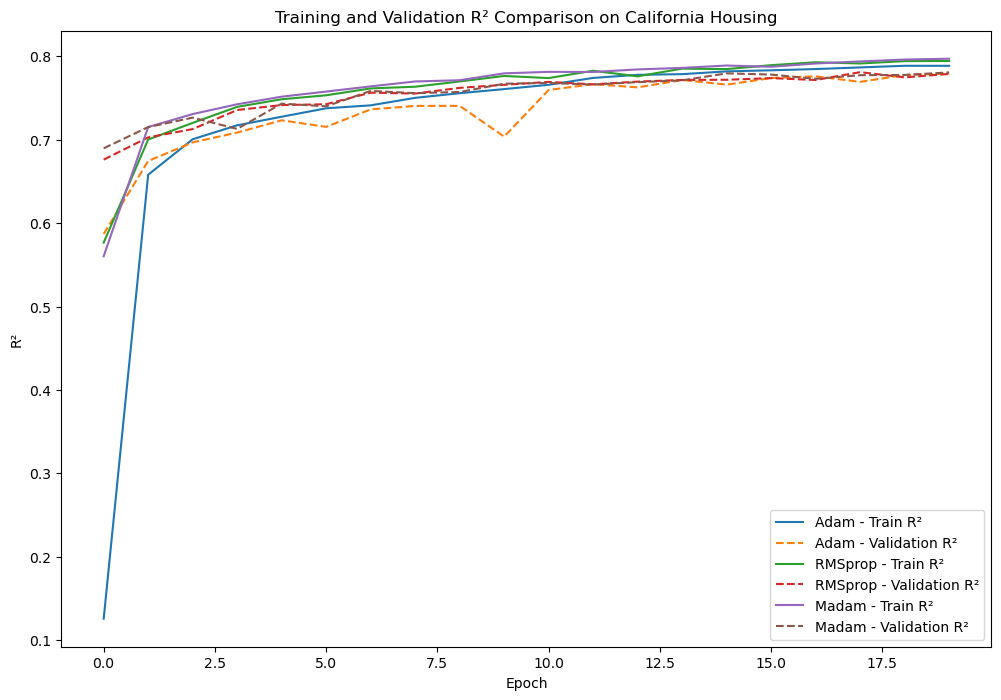

Adam - Min Training Loss: 0.2825, Min Validation Loss: 0.2886
Adam - Min Training MAE: 0.3669, Min Validation MAE: 0.3657
Adam - Max Training R²: 0.7887, Max Validation R²: 0.7793
RMSprop - Min Training Loss: 0.2748, Min Validation Loss: 0.2861
RMSprop - Min Training MAE: 0.3595, Min Validation MAE: 0.3645
RMSprop - Max Training R²: 0.7945, Max Validation R²: 0.7810
Madam - Min Training Loss: 0.2711, Min Validation Loss: 0.2867
Madam - Min Training MAE: 0.3566, Min Validation MAE: 0.3687
Madam - Max Training R²: 0.7972, Max Validation R²: 0.7808


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

class SimpleNet(nn.Module):
    def __init__(self, num_features):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(num_features, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)
    
class Madam(torch.optim.Optimizer):
    def __init__(self, params, lr=0.01, beta1=0.9, beta2=0.999, eps=1e-8):
        defaults = dict(lr=lr, beta1=beta1, beta2=beta2, eps=eps)
        super(Madam, self).__init__(params, defaults)

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                state = self.state[p]

                if len(state) == 0:
                    state['m'] = torch.zeros_like(p.data)
                    state['k'] = torch.zeros_like(p.data)
                    state['v'] = torch.zeros_like(p.data)

                m, k, v = state['m'], state['k'], state['v']
                beta1, beta2, eps, lr = group['beta1'], group['beta2'], group['eps'], group['lr']

                m.mul_(beta1).add_(1 - beta1, grad)
                k.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                v.mul_(beta1).addcdiv_(1 - beta1, grad / (torch.sqrt(k) + eps), v)

                look_ahead = p.data - lr * m / (torch.sqrt(k) + eps)
                p.data.add_(look_ahead - p.data)

        return loss

def create_optimizer(opt_name, model):
    if opt_name == "SGD":
        return optim.SGD(model.parameters(), lr=0.001)
    elif opt_name == "Adam":
        return optim.Adam(model.parameters(), lr=0.001)
    elif opt_name == "RMSprop":
        return optim.RMSprop(model.parameters(), lr=0.001)
    elif opt_name == "Madam":
        return Madam(model.parameters(), lr=0.001)

def train_model_with_metrics(model, optimizer, train_loader, val_loader, num_epochs=10):
    criterion = nn.MSELoss()  
    train_losses, val_losses = [], []
    train_maes, val_maes = [], []
    train_r2s, val_r2s = [], []

    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        running_train_mae = 0.0
        all_train_targets, all_train_preds = [], []

        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()

            # Collect predictions and targets for metrics
            all_train_preds.extend(outputs.cpu().detach().numpy())
            all_train_targets.extend(targets.cpu().detach().numpy())

        # Calculate metrics for training
        train_loss = running_train_loss / len(train_loader)
        train_mae = mean_absolute_error(all_train_targets, all_train_preds)
        train_r2 = r2_score(all_train_targets, all_train_preds)
        train_losses.append(train_loss)
        train_maes.append(train_mae)
        train_r2s.append(train_r2)

        model.eval()
        running_val_loss = 0.0
        running_val_mae = 0.0
        all_val_targets, all_val_preds = [], []

        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                running_val_loss += loss.item()

                all_val_preds.extend(outputs.cpu().detach().numpy())
                all_val_targets.extend(targets.cpu().detach().numpy())

        val_loss = running_val_loss / len(val_loader)
        val_mae = mean_absolute_error(all_val_targets, all_val_preds)
        val_r2 = r2_score(all_val_targets, all_val_preds)
        val_losses.append(val_loss)
        val_maes.append(val_mae)
        val_r2s.append(val_r2)

        print(f"Epoch [{epoch + 1}/{num_epochs}]")
        print(f"  Training Loss: {train_loss:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")
        print(f"  Validation Loss: {val_loss:.4f}, MAE: {val_mae:.4f}, R²: {val_r2:.4f}")

    return train_losses, val_losses, train_maes, val_maes, train_r2s, val_r2s

optimizers = ["Adam", "RMSprop", "Madam"]
num_epochs = 20
results = {}

for opt_name in optimizers:
    model = SimpleNet(num_features=X_train.shape[1])  
    optimizer = create_optimizer(opt_name, model)
    train_losses, val_losses, train_maes, val_maes, train_r2s, val_r2s = train_model_with_metrics(
        model, optimizer, train_loader, val_loader, num_epochs=num_epochs)
    results[opt_name] = {
        'train_loss': train_losses, 
        'val_loss': val_losses,
        'train_mae': train_maes,
        'val_mae': val_maes,
        'train_r2': train_r2s,
        'val_r2': val_r2s
    }
    print(f"{opt_name} training completed.")

plt.figure(figsize=(12, 8))
for opt_name, metrics in results.items():
    plt.plot(metrics['train_loss'], label=f"{opt_name} - Train Loss")
    plt.plot(metrics['val_loss'], label=f"{opt_name} - Validation Loss", linestyle='--')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Comparison on California Housing")
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
for opt_name, metrics in results.items():
    plt.plot(metrics['train_mae'], label=f"{opt_name} - Train MAE")
    plt.plot(metrics['val_mae'], label=f"{opt_name} - Validation MAE", linestyle='--')

plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Training and Validation MAE Comparison on California Housing")
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
for opt_name, metrics in results.items():
    plt.plot(metrics['train_r2'], label=f"{opt_name} - Train R²")
    plt.plot(metrics['val_r2'], label=f"{opt_name} - Validation R²", linestyle='--')

plt.xlabel("Epoch")
plt.ylabel("R²")
plt.title("Training and Validation R² Comparison on California Housing")
plt.legend()
plt.show()

for opt_name, metrics in results.items():
    min_train_loss = min(metrics['train_loss'])
    min_val_loss = min(metrics['val_loss'])
    min_train_mae = min(metrics['train_mae'])
    min_val_mae = min(metrics['val_mae'])
    max_train_r2 = max(metrics['train_r2'])
    max_val_r2 = max(metrics['val_r2'])
    print(f"{opt_name} - Min Training Loss: {min_train_loss:.4f}, Min Validation Loss: {min_val_loss:.4f}")
    print(f"{opt_name} - Min Training MAE: {min_train_mae:.4f}, Min Validation MAE: {min_val_mae:.4f}")
    print(f"{opt_name} - Max Training R²: {max_train_r2:.4f}, Max Validation R²: {max_val_r2:.4f}")
